In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.autograd import Variable

import glob
import os
import matplotlib.pyplot as plt
import torchvision.models as models
import cv2
import pickle
import random

In [2]:
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layers)
        self.fc2 = nn.Linear(hidden_layers, hidden_layers)
        self.fc3 = nn.Linear(hidden_layers, output_size)
    
    def forward(self,data):
        x = F.tanh(self.fc1(data))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x,dim = 1)

In [3]:
def label2onehot(label_id):
    vector = np.zeros(101)
    vector[label_id] = 1
    return vector

def onehot2label(vector):
    return np.argmax(vector)

In [5]:
def chunk(data,batch_size):
    batches = []
    x = np.arange(len(data) // batch_size + 2)*batch_size
#     print(x)
    for b,e in zip(x[0:-1],x[1:]):
        batches.append(data[b:e])
    return batches    

In [4]:
def encode_batch(minibatch):
    label_batch = []
    feature_batch_vector = []
    for label, feature in minibatch:
        label_batch.append(label)
        feature_batch_vector.append(feature.squeeze())
    return np.array(label_batch), np.array(feature_batch_vector)

In [6]:
with open("training_data.pkl","rb") as f:
    training_data = pickle.load(f)
    #random.shuffle(training_data)
    
with open("test_data.pkl","rb") as f:
    test_data = pickle.load(f)

In [ ]:
with open("vgg16_data.pkl","rb") as f:
    temp = pickle.load(f)

In [ ]:
net = temp["net"]

In [ ]:
net.cuda()

In [24]:
onehot2label(net(torch.FloatTensor(test_data[0][1]).cuda()).cpu().data.numpy()[0])

85

In [ ]:
with open("./food-101/meta/train.txt","r") as f:
    training_list = f.readlines()
with open("./food-101/meta/test.txt","r") as f:
    test_list = f.readlines()
    
with open('./food-101/meta/labels.txt','r') as f:
    labels = f.readlines()
    
training_list = ["./food-101/images/"+ path[:-1] +".jpg" for path in training_list]
test_list = ["./food-101/images/"+ path[:-1] +".jpg" for path in test_list]
labels = [label[:-1].replace(" ",'_').lower() for label in labels]

In [ ]:
def validate(test_data,net):
    correct = 0
    for label, feature in test_data:
        x = Variable(torch.FloatTensor(feature)).cuda()
        output = net(x)
        if onehot2label(output.cpu().data.numpy()) == label:
            correct += 1
    return correct / len(test_data)

In [42]:
labels[100]

'waffles'

In [34]:
training_data_dict = {}
for i in range(len(labels)):
    training_data_dict[i] = []

for x in training_data:
    training_data_dict[x[0]].append(x)

In [104]:
test_data_dict = {}
for i in range(len(labels)):
    test_data_dict[i] = []

for x in test_data:
    test_data_dict[x[0]].append(x)

In [68]:
training_acc_of_class = {
    "food_name":[],
    "accuracy":[]
}
for i in range(len(labels)):
    training_acc_of_class["food_name"].append(labels[i])
    training_acc_of_class["accuracy"].append(validate(training_data_dict[i],net))

In [105]:
test_acc_of_class = {
    "food_name":[],
    "accuracy":[]
}
for i in range(len(labels)):
    test_acc_of_class["food_name"].append(labels[i])
    test_acc_of_class["accuracy"].append(validate(test_data_dict[i],net))

In [102]:
training_acc_of_class

{'accuracy': [0.6386666666666667,
  0.792,
  0.8226666666666667,
  0.8133333333333334,
  0.7026666666666667,
  0.7426666666666667,
  0.9213333333333333,
  0.8706666666666667,
  0.6435246995994659,
  0.7346666666666667,
  0.013333333333333334,
  0.836,
  0.8213333333333334,
  0.7573333333333333,
  0.7346666666666667,
  0.6586666666666666,
  0.0,
  0.8493333333333334,
  0.6853333333333333,
  0.7826666666666666,
  0.8186666666666667,
  0.8373333333333334,
  0.7146666666666667,
  0.8426666666666667,
  0.8213333333333334,
  0.8533333333333334,
  0.6466666666666666,
  0.8533333333333334,
  0.784,
  0.9066666666666666,
  0.8626666666666667,
  0.824,
  0.8346666666666667,
  0.9626666666666667,
  0.8546666666666667,
  0.7586666666666667,
  0.6613333333333333,
  0.7546666666666667,
  0.8586666666666667,
  0.6533333333333333,
  0.8946666666666667,
  0.8466666666666667,
  0.7506666666666667,
  0.824,
  0.816,
  0.9,
  0.8066666666666666,
  0.6946666666666667,
  0.852,
  0.0013333333333333333,
  0.

In [106]:
test_acc_of_class

{'accuracy': [0.22,
  0.492,
  0.504,
  0.456,
  0.3,
  0.276,
  0.688,
  0.608,
  0.236,
  0.328,
  0.004,
  0.56,
  0.496,
  0.412,
  0.42,
  0.296,
  0.0,
  0.48,
  0.316,
  0.48,
  0.48,
  0.468,
  0.288,
  0.616,
  0.672,
  0.548,
  0.336,
  0.62,
  0.424,
  0.6,
  0.656,
  0.696,
  0.828,
  0.944,
  0.56,
  0.664,
  0.348,
  0.268,
  0.452,
  0.34,
  0.744,
  0.62,
  0.528,
  0.596,
  0.5,
  0.632,
  0.436,
  0.36,
  0.452,
  0.0,
  0.368,
  0.748,
  0.628,
  0.444,
  0.784,
  0.604,
  0.252,
  0.232,
  0.484,
  0.468,
  0.672,
  0.584,
  0.424,
  0.832,
  0.784,
  0.692,
  0.384,
  0.368,
  0.688,
  0.732,
  0.752,
  0.512,
  0.416,
  0.396,
  0.404,
  0.728,
  0.664,
  0.312,
  0.592,
  0.384,
  0.428,
  0.388,
  0.26,
  0.624,
  0.412,
  0.44,
  0.736,
  0.308,
  0.708,
  0.372,
  0.64,
  0.72,
  0.54,
  0.0,
  0.512,
  0.416,
  0.324,
  0.536,
  0.528,
  0.2,
  0.66],
 'food_name': ['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_sa

In [55]:
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")

In [107]:
pd_training_acc_of_class = pd.DataFrame.from_dict(training_acc_of_class)
pd_test_acc_of_class = pd.DataFrame.from_dict(test_acc_of_class)

In [108]:
pd_training_acc_of_class.sort_values(by = ["accuracy"],ascending=False)

,accuracy,food_name
33,0.962667,edamame
63,0.949333,macarons
75,0.937333,pho
54,0.932000,hot_and_sour_soup
64,0.925333,miso_soup
6,0.921333,beignets
90,0.920000,spaghetti_bolognese
91,0.918667,spaghetti_carbonara
88,0.917333,seaweed_salad
70,0.910667,pad_thai


In [109]:
pd_test_acc_of_class.sort_values(by = ["accuracy"],ascending=False)

,accuracy,food_name
33,0.944,edamame
63,0.832,macarons
32,0.828,dumplings
64,0.784,miso_soup
54,0.784,hot_and_sour_soup
70,0.752,pad_thai
51,0.748,guacamole
40,0.744,french_fries
86,0.736,sashimi
69,0.732,oysters


In [113]:
pd_training_acc_of_class.to_csv("pd_training_acc_of_class.csv")

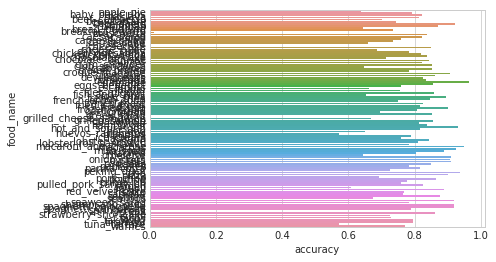

In [83]:
#sns.barplot(x = "accuracy", y = "food_name", data = pd_training_acc_of_class)

In [115]:
sns#barplot(x = "accuracy", y = "food_name", data = pd_training_acc_of_class.sort_values(by = ["accuracy"],ascending=False)[:20])

<module 'seaborn' from '/opt/conda/lib/python3.6/site-packages/seaborn/__init__.py'>

In [132]:
# steak
def show_error_result(test_data, net,error_labels):
    error = 0
    for label, feature in test_data:
        x = Variable(torch.FloatTensor(feature)).cuda()
        output = net(x)
        predict_label_index = onehot2label(output.cpu().data.numpy())
        if predict_label_index != label:
#             print(predict_label_index)
            error += 1
            error_labels.append(predict_label_index)
            
    

In [133]:
# steak error
steak_error_labels = []
show_error_result(training_data_dict[93],net,steak_error_labels)

In [137]:
pd.Series([labels[lb] for lb in steak_error_labels]).value_counts()

pork_chop                112
baby_back_ribs            94
filet_mignon              70
grilled_salmon            45
french_toast              41
foie_gras                 21
crab_cakes                20
prime_rib                 19
hamburger                 13
peking_duck               13
pulled_pork_sandwich      12
bread_pudding             12
tuna_tartare              12
escargots                 11
waffles                   11
fried_calamari            11
caprese_salad             10
beef_tartare               9
mussels                    9
chicken_wings              8
cheese_plate               8
seaweed_salad              8
gyoza                      7
falafel                    7
beef_carpaccio             7
fish_and_chips             7
omelette                   6
chocolate_cake             6
pad_thai                   6
takoyaki                   6
                        ... 
churros                    3
nachos                     2
lasagna                    2
beet_salad    

In [138]:
# steak error
bruschetta_error_labels = []
show_error_result(training_data_dict[10],net,bruschetta_error_labels)

In [139]:
pd.Series([labels[lb] for lb in bruschetta_error_labels]).value_counts()

lobster_roll_sandwich    61
beef_carpaccio           39
caprese_salad            38
sushi                    27
takoyaki                 27
tuna_tartare             26
ceviche                  26
pizza                    25
tacos                    21
grilled_salmon           18
waffles                  18
beef_tartare             17
huevos_rancheros         17
french_toast             16
crab_cakes               15
gyoza                    14
nachos                   14
pork_chop                14
beet_salad               13
eggs_benedict            12
foie_gras                11
greek_salad              11
omelette                 10
ravioli                  10
pulled_pork_sandwich     10
hot_dog                  10
scallops                 10
donuts                   10
caesar_salad             10
gnocchi                   9
                         ..
fried_calamari            3
paella                    3
escargots                 3
bread_pudding             3
croque_madame       